In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#This is the goal. Run one single thing to get all of the data nice and tight. 


def nbaDataClean():
    
    #Step 1: Get All NBA data from csv. 
    #Step 1.2: Make Allnba into a 4 column data frame. Index, Name, Year, Position. 
    
    #Step 2: For every year that we have all nba data for
                    # Use pd.read_html and get the dataframe. 
                    # remove unnecessary rows of data.
                    # combine and average out duplicate players.
                    # Create a year row and place it on all players.
    #Step 3: Combine all years of data. 
    #Step 4: Create an AllNBA row for the main data frame. 
    #Step 5: If 
    finaldata = []
    return finaldata

In [3]:
ogallnba = pd.read_csv('allnba.csv')

In [4]:
ogallnba.head() 

,Season,Lg,Tm,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2018-19,NBA,1st,Nikola Jokić C,Giannis Antetokounmpo F,Paul George F,James Harden G,Stephen Curry G
1,2018-19,NBA,2nd,Joel Embiid C,Kevin Durant F,Kawhi Leonard F,Damian Lillard G,Kyrie Irving G
2,2018-19,NBA,3rd,Rudy Gobert C,LeBron James F,Blake Griffin F,Kemba Walker G,Russell Westbrook G
3,2017-18,NBA,1st,Anthony Davis C,LeBron James F,Kevin Durant F,Damian Lillard G,James Harden G
4,2017-18,NBA,2nd,Joel Embiid C,Giannis Antetokounmpo F,LaMarcus Aldridge F,Russell Westbrook G,DeMar DeRozan G


In [5]:
ogallnba.drop(['Lg','Tm'], axis =1, inplace= True)
ogallnba.head()

,Season,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2018-19,Nikola Jokić C,Giannis Antetokounmpo F,Paul George F,James Harden G,Stephen Curry G
1,2018-19,Joel Embiid C,Kevin Durant F,Kawhi Leonard F,Damian Lillard G,Kyrie Irving G
2,2018-19,Rudy Gobert C,LeBron James F,Blake Griffin F,Kemba Walker G,Russell Westbrook G
3,2017-18,Anthony Davis C,LeBron James F,Kevin Durant F,Damian Lillard G,James Harden G
4,2017-18,Joel Embiid C,Giannis Antetokounmpo F,LaMarcus Aldridge F,Russell Westbrook G,DeMar DeRozan G


In [6]:
allnbadf = pd.DataFrame()



In [7]:
for x, y in ogallnba.iterrows():
    
    for column in y:
        if column == y[0]:
            year = y[0] 
        
        else:
            row = pd.DataFrame([[year,column[:-1],column[-1:]]])
            allnbadf = pd.concat([row,allnbadf],ignore_index = True)
allnbadf.head()

,0,1,2
0,1988-89,Mark Price,G
1,1988-89,Dale Ellis,G
2,1988-89,Dominique Wilkins,F
3,1988-89,Terry Cummings,F
4,1988-89,Robert Parish,C


In [8]:
allnbadf.rename(columns = {0: 'Year', 1 : 'Player' , 2 : 'Position'} , inplace = True)

allnbadf.head()

,Year,Player,Position
0,1988-89,Mark Price,G
1,1988-89,Dale Ellis,G
2,1988-89,Dominique Wilkins,F
3,1988-89,Terry Cummings,F
4,1988-89,Robert Parish,C


In [9]:
allnbadf['Year'][0] == '1988-89'

True

In [10]:
#This loop is used to get scarpe data from multiple web pages from basketball reference.
#I chose to do this because it makes more since to do it this way than to download 20+ csv's individually.
#It loops through each webpage, and then appends the new to the main data frame. 


nbaYear= 1989
initPage = 0 
while nbaYear < 2020:
    
    if initPage == 0:
    
        iterPage = pd.read_html('https://www.basketball-reference.com/leagues/NBA_'+str(nbaYear)+'_totals.html')
        iterPage = iterPage[0]
        iterPage['Year'] = str(nbaYear-1)+'-'+str(nbaYear)[-2:]
        nbaDF = iterPage
        print(str(nbaYear-1)+'-'+str(nbaYear)[-2:])
        print(len(nbaDF[nbaDF['Year'] == str(nbaYear-1)+'-'+str(nbaYear)[-2:]]))
        nbaYear += 1 
        initPage = 1 
    else:
        iterPage = pd.read_html('https://www.basketball-reference.com/leagues/NBA_'+str(nbaYear)+'_totals.html')
        iterPage = iterPage[0]
        iterPage['Year'] = str(nbaYear-1)+'-'+str(nbaYear)[-2:]
        nbaDF = nbaDF.append(iterPage)
        print(str(nbaYear-1)+'-'+str(nbaYear)[-2:])
        print(len(nbaDF[nbaDF['Year'] == str(nbaYear-1)+'-'+str(nbaYear)[-2:]]))
        nbaYear += 1 
    
   

1988-89
455
1989-90
478
1990-91
460
1991-92
477
1992-93
468
1993-94
501
1994-95
472
1995-96
566
1996-97
596
1997-98
568
1998-99
528
1999-00
517
2000-01
559
2001-02
521
2002-03
504
2003-04
607
2004-05
608
2005-06
585
2006-07
538
2007-08
617
2008-09
604
2009-10
600
2010-11
647
2011-12
574
2012-13
596
2013-14
635
2014-15
675
2015-16
601
2016-17
619
2017-18
690
2018-19
734


In [11]:
len(nbaDF)

17600

In [12]:
nbaDF.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Kareem Abdul-Jabbar*,C,41,LAL,74,74,1695,313,659,...,103,231,334,74,38,85,95,196,748,1988-89
1,2,Mark Acres,C,26,BOS,62,0,632,55,114,...,59,87,146,19,19,6,23,94,137,1988-89
2,3,Michael Adams,PG,26,DEN,77,77,2787,468,1082,...,71,212,283,490,166,11,180,149,1424,1988-89
3,4,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,...,146,240,386,278,45,36,208,229,1511,1988-89
4,4,Mark Aguirre,SF,29,DAL,44,44,1529,373,829,...,90,145,235,189,29,29,140,128,953,1988-89
5,4,Mark Aguirre,SF,29,DET,36,32,1068,213,441,...,56,95,151,89,16,7,68,101,558,1988-89
6,5,Danny Ainge,PG,29,TOT,73,54,2377,480,1051,...,71,184,255,402,93,8,145,186,1281,1988-89
7,5,Danny Ainge,PG,29,BOS,45,28,1349,271,589,...,37,117,154,215,52,1,82,108,714,1988-89
8,5,Danny Ainge,PG,29,SAC,28,26,1028,209,462,...,34,67,101,187,41,7,63,78,567,1988-89
9,6,Mark Alarie,PF,25,WSB,74,5,1141,206,431,...,103,152,255,63,25,22,62,160,498,1988-89


In [13]:
len(nbaDF[nbaDF['Year'] == '1988-89'])

455

In [14]:
nbaDF = nbaDF.reset_index(drop= True)

In [15]:
nbaDF[nbaDF['Player'] == 'Player']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
26,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
51,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
74,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
99,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
120,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
143,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
168,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
191,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
219,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89
246,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,1988-89


In [16]:
nbaDF.drop(nbaDF[nbaDF['Player'] == "Player"].index, inplace = True)

In [17]:
len(nbaDF[nbaDF['Year'] == '1988-89'])

438

In [18]:
nbaDF.drop(columns = ["FG%", "FG%" , "3P%" , "2P%" , "eFG%", "FT%", "Rk"] , inplace = True)

In [19]:
nbaDF[nbaDF['Year'] == '1988-89']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar*,C,41,LAL,74,74,1695,313,659,0,...,103,231,334,74,38,85,95,196,748,1988-89
1,Mark Acres,C,26,BOS,62,0,632,55,114,1,...,59,87,146,19,19,6,23,94,137,1988-89
2,Michael Adams,PG,26,DEN,77,77,2787,468,1082,166,...,71,212,283,490,166,11,180,149,1424,1988-89
3,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,51,...,146,240,386,278,45,36,208,229,1511,1988-89
4,Mark Aguirre,SF,29,DAL,44,44,1529,373,829,29,...,90,145,235,189,29,29,140,128,953,1988-89
5,Mark Aguirre,SF,29,DET,36,32,1068,213,441,22,...,56,95,151,89,16,7,68,101,558,1988-89
6,Danny Ainge,PG,29,TOT,73,54,2377,480,1051,116,...,71,184,255,402,93,8,145,186,1281,1988-89
7,Danny Ainge,PG,29,BOS,45,28,1349,271,589,58,...,37,117,154,215,52,1,82,108,714,1988-89
8,Danny Ainge,PG,29,SAC,28,26,1028,209,462,58,...,34,67,101,187,41,7,63,78,567,1988-89
9,Mark Alarie,PF,25,WSB,74,5,1141,206,431,13,...,103,152,255,63,25,22,62,160,498,1988-89


In [71]:
nbaDF[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P',
       '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']] = nbaDF[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P',
       '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS']].astype(np.float64)

In [21]:
nbaDF[nbaDF['Year'] == '1988-89']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar*,C,41,LAL,74,74,1695,313,659,0,...,103,231,334,74,38,85,95,196,748,1988-89
1,Mark Acres,C,26,BOS,62,0,632,55,114,1,...,59,87,146,19,19,6,23,94,137,1988-89
2,Michael Adams,PG,26,DEN,77,77,2787,468,1082,166,...,71,212,283,490,166,11,180,149,1424,1988-89
3,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,51,...,146,240,386,278,45,36,208,229,1511,1988-89
4,Mark Aguirre,SF,29,DAL,44,44,1529,373,829,29,...,90,145,235,189,29,29,140,128,953,1988-89
5,Mark Aguirre,SF,29,DET,36,32,1068,213,441,22,...,56,95,151,89,16,7,68,101,558,1988-89
6,Danny Ainge,PG,29,TOT,73,54,2377,480,1051,116,...,71,184,255,402,93,8,145,186,1281,1988-89
7,Danny Ainge,PG,29,BOS,45,28,1349,271,589,58,...,37,117,154,215,52,1,82,108,714,1988-89
8,Danny Ainge,PG,29,SAC,28,26,1028,209,462,58,...,34,67,101,187,41,7,63,78,567,1988-89
9,Mark Alarie,PF,25,WSB,74,5,1141,206,431,13,...,103,152,255,63,25,22,62,160,498,1988-89


In [22]:
nbaDF['Player'] = nbaDF['Player'].apply(lambda x: x.strip('*'))

In [23]:
nbaDF[nbaDF['Year'] == '1988-89']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,1695,313,659,0,...,103,231,334,74,38,85,95,196,748,1988-89
1,Mark Acres,C,26,BOS,62,0,632,55,114,1,...,59,87,146,19,19,6,23,94,137,1988-89
2,Michael Adams,PG,26,DEN,77,77,2787,468,1082,166,...,71,212,283,490,166,11,180,149,1424,1988-89
3,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,51,...,146,240,386,278,45,36,208,229,1511,1988-89
4,Mark Aguirre,SF,29,DAL,44,44,1529,373,829,29,...,90,145,235,189,29,29,140,128,953,1988-89
5,Mark Aguirre,SF,29,DET,36,32,1068,213,441,22,...,56,95,151,89,16,7,68,101,558,1988-89
6,Danny Ainge,PG,29,TOT,73,54,2377,480,1051,116,...,71,184,255,402,93,8,145,186,1281,1988-89
7,Danny Ainge,PG,29,BOS,45,28,1349,271,589,58,...,37,117,154,215,52,1,82,108,714,1988-89
8,Danny Ainge,PG,29,SAC,28,26,1028,209,462,58,...,34,67,101,187,41,7,63,78,567,1988-89
9,Mark Alarie,PF,25,WSB,74,5,1141,206,431,13,...,103,152,255,63,25,22,62,160,498,1988-89


In [24]:
nbaDF.head(10)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,1695,313,659,0,...,103,231,334,74,38,85,95,196,748,1988-89
1,Mark Acres,C,26,BOS,62,0,632,55,114,1,...,59,87,146,19,19,6,23,94,137,1988-89
2,Michael Adams,PG,26,DEN,77,77,2787,468,1082,166,...,71,212,283,490,166,11,180,149,1424,1988-89
3,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,51,...,146,240,386,278,45,36,208,229,1511,1988-89
4,Mark Aguirre,SF,29,DAL,44,44,1529,373,829,29,...,90,145,235,189,29,29,140,128,953,1988-89
5,Mark Aguirre,SF,29,DET,36,32,1068,213,441,22,...,56,95,151,89,16,7,68,101,558,1988-89
6,Danny Ainge,PG,29,TOT,73,54,2377,480,1051,116,...,71,184,255,402,93,8,145,186,1281,1988-89
7,Danny Ainge,PG,29,BOS,45,28,1349,271,589,58,...,37,117,154,215,52,1,82,108,714,1988-89
8,Danny Ainge,PG,29,SAC,28,26,1028,209,462,58,...,34,67,101,187,41,7,63,78,567,1988-89
9,Mark Alarie,PF,25,WSB,74,5,1141,206,431,13,...,103,152,255,63,25,22,62,160,498,1988-89


In [25]:
nbaDF[nbaDF['Year'] == '1988-89']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,1695,313,659,0,...,103,231,334,74,38,85,95,196,748,1988-89
1,Mark Acres,C,26,BOS,62,0,632,55,114,1,...,59,87,146,19,19,6,23,94,137,1988-89
2,Michael Adams,PG,26,DEN,77,77,2787,468,1082,166,...,71,212,283,490,166,11,180,149,1424,1988-89
3,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,51,...,146,240,386,278,45,36,208,229,1511,1988-89
4,Mark Aguirre,SF,29,DAL,44,44,1529,373,829,29,...,90,145,235,189,29,29,140,128,953,1988-89
5,Mark Aguirre,SF,29,DET,36,32,1068,213,441,22,...,56,95,151,89,16,7,68,101,558,1988-89
6,Danny Ainge,PG,29,TOT,73,54,2377,480,1051,116,...,71,184,255,402,93,8,145,186,1281,1988-89
7,Danny Ainge,PG,29,BOS,45,28,1349,271,589,58,...,37,117,154,215,52,1,82,108,714,1988-89
8,Danny Ainge,PG,29,SAC,28,26,1028,209,462,58,...,34,67,101,187,41,7,63,78,567,1988-89
9,Mark Alarie,PF,25,WSB,74,5,1141,206,431,13,...,103,152,255,63,25,22,62,160,498,1988-89


In [26]:
nbaDF.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA',
       '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [27]:
type(nbaDF.iloc[0][4])

float

In [28]:
nbaDF.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,1695,313,659,0,...,103,231,334,74,38,85,95,196,748,1988-89
1,Mark Acres,C,26,BOS,62,0,632,55,114,1,...,59,87,146,19,19,6,23,94,137,1988-89
2,Michael Adams,PG,26,DEN,77,77,2787,468,1082,166,...,71,212,283,490,166,11,180,149,1424,1988-89
3,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,51,...,146,240,386,278,45,36,208,229,1511,1988-89
4,Mark Aguirre,SF,29,DAL,44,44,1529,373,829,29,...,90,145,235,189,29,29,140,128,953,1988-89


In [29]:
nbaDF.iloc[0][3:]

Tm          LAL
G            74
GS           74
MP         1695
FG          313
FGA         659
3P            0
3PA           3
2P          313
2PA         656
FT          122
FTA         165
ORB         103
DRB         231
TRB         334
AST          74
STL          38
BLK          85
TOV          95
PF          196
PTS         748
Year    1988-89
Name: 0, dtype: object

In [30]:
nbaDF[nbaDF['Player'] == 'Ryan Anderson']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
10644,Ryan Anderson,PF,20,NJN,66,30,1312,160,407,69,...,104,207,311,52,44,20,63,157,487,2008-09
11243,Ryan Anderson,PF,21,ORL,63,6,911,169,388,78,...,70,132,202,37,25,14,56,81,487,2009-10
11848,Ryan Anderson,PF,22,ORL,64,14,1424,226,525,134,...,129,226,355,52,30,38,49,137,681,2010-11
12491,Ryan Anderson,PF,23,ORL,61,61,1964,332,757,166,...,224,247,471,54,50,26,57,146,980,2011-12
13071,Ryan Anderson,PF,24,NOH,81,22,2503,472,1115,213,...,191,328,519,97,42,31,97,179,1309,2012-13
13669,Ryan Anderson,PF,25,NOP,22,14,795,155,354,67,...,66,76,142,17,10,7,20,47,436,2013-14
14301,Ryan Anderson,PF,26,NOP,61,5,1675,291,729,122,...,108,187,295,55,33,20,62,113,833,2014-15
14975,Ryan Anderson,PF,27,NOP,66,7,2008,397,929,131,...,131,265,396,73,38,25,90,109,1124,2015-16
15575,Ryan Anderson,PF,28,HOU,72,72,2116,323,773,204,...,112,218,330,68,31,14,55,142,979,2016-17
16189,Ryan Anderson,PF,29,HOU,66,50,1725,207,480,131,...,94,237,331,60,24,21,42,126,617,2017-18


In [31]:
#In our Dataframes, there will be multiple instances of the same person for the same year.
#This is because NBA reference seperates stats for a player when the player gets traded to a different team.
#However they also keep track of the players total stats for the year.
#It seems that they've made it so that the player's total is always before the other instances of their names.
#This code will get rid of all the 'non-total' stats. 

previousPlayer = 0

for x, y in nbaDF.iterrows():
    if y[0] == previousPlayer:
        nbaDF.drop(x, inplace = True)
        previousPlayer = y[0]
        
    else:
        previousPlayer = y[0]

In [32]:
nbaDF[nbaDF['Player'] == 'Ryan Anderson']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
10644,Ryan Anderson,PF,20,NJN,66,30,1312,160,407,69,...,104,207,311,52,44,20,63,157,487,2008-09
11243,Ryan Anderson,PF,21,ORL,63,6,911,169,388,78,...,70,132,202,37,25,14,56,81,487,2009-10
11848,Ryan Anderson,PF,22,ORL,64,14,1424,226,525,134,...,129,226,355,52,30,38,49,137,681,2010-11
12491,Ryan Anderson,PF,23,ORL,61,61,1964,332,757,166,...,224,247,471,54,50,26,57,146,980,2011-12
13071,Ryan Anderson,PF,24,NOH,81,22,2503,472,1115,213,...,191,328,519,97,42,31,97,179,1309,2012-13
13669,Ryan Anderson,PF,25,NOP,22,14,795,155,354,67,...,66,76,142,17,10,7,20,47,436,2013-14
14301,Ryan Anderson,PF,26,NOP,61,5,1675,291,729,122,...,108,187,295,55,33,20,62,113,833,2014-15
14975,Ryan Anderson,PF,27,NOP,66,7,2008,397,929,131,...,131,265,396,73,38,25,90,109,1124,2015-16
15575,Ryan Anderson,PF,28,HOU,72,72,2116,323,773,204,...,112,218,330,68,31,14,55,142,979,2016-17
16189,Ryan Anderson,PF,29,HOU,66,50,1725,207,480,131,...,94,237,331,60,24,21,42,126,617,2017-18


In [33]:
nbaDF['All Nba'] = 0

In [34]:
nbaDF['Player'] = nbaDF['Player'].apply(lambda x: x.strip('*'))

In [35]:
nbaDF = nbaDF.reset_index(drop= True)

In [36]:
allnbadf.head()

,Year,Player,Position
0,1988-89,Mark Price,G
1,1988-89,Dale Ellis,G
2,1988-89,Dominique Wilkins,F
3,1988-89,Terry Cummings,F
4,1988-89,Robert Parish,C


In [37]:
nbaDF[(nbaDF['Year'] == '2018-19') &  (nbaDF['Player'] == 'Ryan Anderson')]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All Nba
13245,Ryan Anderson,PF,30,TOT,25,8,322,21,69,9,...,36,54,19,4,1,14,25,63,2018-19,0


In [38]:
nbaDF[nbaDF['Year'] == '1988-89']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All Nba
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,1695,313,659,0,...,231,334,74,38,85,95,196,748,1988-89,0
1,Mark Acres,C,26,BOS,62,0,632,55,114,1,...,87,146,19,19,6,23,94,137,1988-89,0
2,Michael Adams,PG,26,DEN,77,77,2787,468,1082,166,...,212,283,490,166,11,180,149,1424,1988-89,0
3,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,51,...,240,386,278,45,36,208,229,1511,1988-89,0
4,Danny Ainge,PG,29,TOT,73,54,2377,480,1051,116,...,184,255,402,93,8,145,186,1281,1988-89,0
5,Mark Alarie,PF,25,WSB,74,5,1141,206,431,13,...,152,255,63,25,22,62,160,498,1988-89,0
6,Steve Alford,PG,24,TOT,66,3,906,148,324,20,...,62,72,92,45,3,45,57,366,1988-89,0
7,Randy Allen,SG,24,SAC,7,0,43,8,19,0,...,4,7,0,1,1,2,7,17,1988-89,0
8,Greg Anderson,PF,24,SAS,82,56,2401,460,914,0,...,421,676,61,102,103,180,221,1127,1988-89,0
9,Michael Anderson,PG,22,SAS,36,12,730,73,175,1,...,45,89,153,44,3,84,64,204,1988-89,0


In [39]:
nbaDF['Year'][0] == allnbadf['Year'][0]

True

In [40]:
nbaDF[nbaDF['Player'] == 'Mark Price']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All Nba
245,Mark Price,PG,24,CLE,75,74,2728,529,1006,93,...,178,226,631,115,7,212,98,1414,1988-89,0
620,Mark Price,PG,25,CLE,73,73,2706,489,1066,152,...,185,251,666,114,5,214,89,1430,1989-90,0
1003,Mark Price,PG,26,CLE,16,16,571,97,195,18,...,37,45,166,42,2,56,23,271,1990-91,0
1394,Mark Price,PG,27,CLE,72,72,2138,438,897,101,...,135,173,535,94,12,159,113,1247,1991-92,0
1785,Mark Price,PG,28,CLE,75,74,2380,477,986,122,...,164,201,602,89,11,196,105,1365,1992-93,0
2193,Mark Price,PG,29,CLE,76,73,2386,480,1005,118,...,189,228,589,103,11,189,93,1316,1993-94,0
2586,Mark Price,PG,30,CLE,48,34,1375,253,612,103,...,87,112,335,35,4,142,50,757,1994-95,0
3003,Mark Price,PG,31,WSB,7,1,127,18,60,10,...,6,7,18,6,0,10,7,56,1995-96,0
3440,Mark Price,PG,32,GSW,70,49,1876,263,589,112,...,143,179,342,67,3,161,100,793,1996-97,0
3885,Mark Price,PG,33,ORL,63,33,1430,229,531,52,...,105,129,297,53,5,162,92,597,1997-98,0


In [41]:
allnbadf['Player'][0]

'Mark Price '

In [42]:
for x,y in allnbadf.iterrows():
    y[1] = y[1].rstrip()
    

In [43]:
allnbadf['Player'][0]

'Mark Price'

In [44]:
for x,y in allnbadf.iterrows():
    allnbaindex = nbaDF[(nbaDF['Year'] == y[0]) & (nbaDF['Player'] == y[1])].index
    nbaDF.loc[(allnbaindex,'All Nba')] = 1
    

In [45]:
nbaDF[nbaDF['All Nba'] == 1]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,All Nba
17,Charles Barkley,PF,25,PHI,79,79,3088,700,1208,35,...,583,986,325,126,67,254,262,2037,1988-89,1
46,Tom Chambers,PF,29,PHO,81,81,3002,774,1643,28,...,541,684,231,87,55,231,271,2085,1988-89,1
62,Terry Cummings,SF,27,MIL,80,78,2824,730,1563,7,...,369,650,198,106,72,201,265,1829,1988-89,1
89,Dale Ellis,SG,28,SEA,82,82,3190,857,1710,162,...,186,342,164,108,22,218,197,2253,1988-89,1
92,Patrick Ewing,C,26,NYK,80,80,2896,727,1282,0,...,527,740,188,117,281,266,311,1815,1988-89,1
152,Kevin Johnson,PG,22,PHO,81,81,3179,570,1128,2,...,294,340,991,135,24,322,226,1650,1988-89,1
153,Magic Johnson,PG,29,LAL,77,77,2886,579,1137,59,...,496,607,988,138,22,312,172,1730,1988-89,1
161,Michael Jordan,SG,25,CHI,81,81,3255,966,1795,27,...,503,652,650,234,65,290,247,2633,1988-89,1
195,Karl Malone,PF,25,UTA,80,80,3126,809,1559,5,...,594,853,219,144,70,285,286,2326,1988-89,1
215,Chris Mullin,SF,25,GSW,82,82,3093,830,1630,23,...,331,483,415,176,39,296,178,2176,1988-89,1


In [46]:
#The position of a player is very important when it comes to reaching an all NBA team.
#This is because making the all NBA team doesn't mean your a top 15 player.
#Making an all NBA team means that you were a top 6 at your position when it comes to Guards / Forwards.
#Or top 3 at your position when it comes to Centers. 
#I've decided to ommit the 'Guard' dummy variable. Meaning if they get a 0 on both Forward and Center.
#Our model will know they are a guard. 

nbaDF['Forward'] = 0
nbaDF['Center'] = 0

In [47]:
for x,y in nbaDF.iterrows():
    if nbaDF.loc[(x,'Pos')] == 'SF' or nbaDF.loc[(x,'Pos')] == 'PF':
        nbaDF.loc[(x,'Forward')] = 1 
    elif nbaDF.loc[(x,'Pos')] == 'C':
        nbaDF.loc[(x,'Center')] = 1 

In [48]:
nbaDF.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,AST,STL,BLK,TOV,PF,PTS,Year,All Nba,Forward,Center
0,Kareem Abdul-Jabbar,C,41,LAL,74,74,1695,313,659,0,...,74,38,85,95,196,748,1988-89,0,0,1
1,Mark Acres,C,26,BOS,62,0,632,55,114,1,...,19,19,6,23,94,137,1988-89,0,0,1
2,Michael Adams,PG,26,DEN,77,77,2787,468,1082,166,...,490,166,11,180,149,1424,1988-89,0,0,0
3,Mark Aguirre,SF,29,TOT,80,76,2597,586,1270,51,...,278,45,36,208,229,1511,1988-89,0,1,0
4,Danny Ainge,PG,29,TOT,73,54,2377,480,1051,116,...,402,93,8,145,186,1281,1988-89,0,0,0


In [49]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

<Figure size 864x576 with 0 Axes>

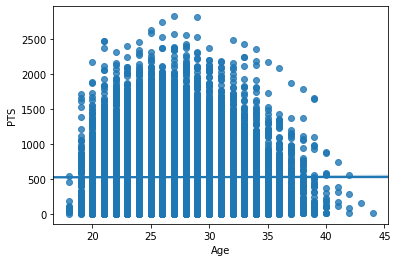

In [73]:
sns.regplot(x = 'Age' , y = 'PTS' , data = nbaDF)

In [72]:
nbaDF.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
3P         float64
3PA        float64
2P         float64
2PA        float64
FT         float64
FTA        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year        object
All Nba      int64
Forward      int64
Center       int64
dtype: object

In [74]:
nbaDF[['All Nba', 'Forward' , 'Center']]= nbaDF[['All Nba', 'Forward' , 'Center']].astype(np.float64)

In [75]:
nbaDF.dtypes

Player      object
Pos         object
Age        float64
Tm          object
G          float64
GS         float64
MP         float64
FG         float64
FGA        float64
3P         float64
3PA        float64
2P         float64
2PA        float64
FT         float64
FTA        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year        object
All Nba    float64
Forward    float64
Center     float64
dtype: object

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [80]:
y = nbaDF['All Nba']
x = nbaDF[['Age','G','GS','MP','FG',
          'FGA','3P','3PA','2P','2PA',
          'FT','FTA','ORB','DRB','TRB','AST',
          'STL','BLK','TOV','PF','PTS','Forward','Center']]

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)

In [85]:
logmodel = LogisticRegression(solver = 'sag' , max_iter = 10000)

In [83]:
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
predictions = logmodel.predict(x_test)

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3969
         1.0       0.85      0.58      0.69       159

    accuracy                           0.98      4128
   macro avg       0.92      0.79      0.84      4128
weighted avg       0.98      0.98      0.98      4128



In [90]:
confusion_matrix(y_test,predictions)

array([[3953,   16],
       [  66,   93]], dtype=int64)

In [91]:
logmodel.pvalues

AttributeError: 'LogisticRegression' object has no attribute 'pvalues'